In [1]:
from google.colab import drive #Library ini khusus untuk Google Colab dan menyediakan fungsi-fungsi untuk berinteraksi dengan lingkungan Colab, seperti mengakses Google Drive (drive).
import pandas as pd #digunakan untuk manipulasi dan analisis data.
from sklearn.cluster import KMeans, MiniBatchKMeans #Library ini berisi berbagai algoritma clustering seperti KMeans, MiniBatchKMeans, dan AgglomerativeClustering digunakan untuk mengelompokkan data.
from sklearn.preprocessing import StandardScaler #Library ini menyediakan fungsi-fungsi untuk melakukan preprocessing data, seperti standarisasi fitur menggunakan StandardScaler.
from sklearn.cluster import KMeans, AgglomerativeClustering #Library ini berisi berbagai algoritma clustering seperti KMeans, MiniBatchKMeans, dan AgglomerativeClustering digunakan untuk mengelompokkan data.
from sklearn.metrics import silhouette_score, davies_bouldin_score #Library ini berisi fungsi-fungsi untuk mengevaluasi kinerja model machine learning, termasuk clustering digunakan untuk menghitung silhouette score, davies bouldin score, dan calinski harabasz score.
from scipy.spatial.distance import cdist #Library ini menyediakan fungsi-fungsi untuk menghitung jarak antara titik-titik data, seperti cdist.
from scipy.cluster.hierarchy import dendrogram, linkage #Library ini menyediakan fungsi-fungsi untuk melakukan hierarchical clustering dan membuat dendrogram menggunakan dendrogram dan linkage.
from sklearn.metrics import calinski_harabasz_score ##Library ini berisi fungsi-fungsi untuk mengevaluasi kinerja model machine learning, termasuk clustering digunakan untuk menghitung silhouette score, davies bouldin score, dan calinski harabasz score.
from sklearn.metrics import silhouette_samples #Library ini berisi fungsi-fungsi untuk mengevaluasi kinerja model machine learning, termasuk clustering digunakan untuk menghitung silhouette score, davies bouldin score, dan calinski harabasz score.
import matplotlib.pyplot as plt #Library ini digunakan untuk membuat visualisasi data, seperti plot dan grafik.
import numpy as np #Library ini menyediakan fungsi-fungsi untuk melakukan operasi matematika dan numerik pada array multidimensi.

In [4]:
data = pd.read_csv('/content/clusteringweek06.csv')
#membaca data

In [5]:
chunk_size = 1000
data_list = []
for chunk in pd.read_csv('clusteringweek06.csv', chunksize=chunk_size):
    data_list.append(chunk)
#membaca data dalam chunks

data = pd.concat(data_list, ignore_index=True)
#menggabungkan data dari chunks

In [6]:
data = pd.concat(data_list, axis=0)
data_sampled = data.sample(frac=0.1, random_state=0)
#menggabungkan semua chunks menjadi satu DataFrame yang lebih kecil

In [7]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_sampled)
#standarisasi data numerik

In [8]:
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans_labels = kmeans.fit_predict(data_scaled)
#K-Means clustering

kmeans_silhouette = silhouette_score(data_scaled, kmeans_labels)
kmeans_davies = davies_bouldin_score(data_scaled, kmeans_labels)
kmeans_calinski = calinski_harabasz_score(data_scaled, kmeans_labels)

print("K-Means Silhouette Score:", kmeans_silhouette)
print("K-Means Davies-Bouldin Score:", kmeans_davies)
print("K-Means Calinski-Harabasz Score:", kmeans_calinski)
#mengitung nilai Silhouette dan Davies-Bouldin untuk KMeans

K-Means Silhouette Score: 0.18735384032613425
K-Means Davies-Bouldin Score: 1.3798722085537432
K-Means Calinski-Harabasz Score: 196.3621230918941


In [10]:
minibatch_kmeans = MiniBatchKMeans(n_clusters=3, random_state=0, batch_size=100)
minibatch_labels = minibatch_kmeans.fit_predict(data_scaled)
# MiniBatchKMeans clustering

minibatch_silhouette = silhouette_score(data_scaled, minibatch_labels)
minibatch_davies = davies_bouldin_score(data_scaled, minibatch_labels)
minibatch_calinski = calinski_harabasz_score(data_scaled, minibatch_labels)

print("MiniBatchKMeans Silhouette Score:", minibatch_silhouette)
print("MiniBatchKMeans Davies-Bouldin Score:", minibatch_davies)
print("MiniBatchKMeans Calinski-Harabasz Score:", minibatch_calinski)
#menghitung nilai Silhouette dan Davies-Bouldin untuk MiniBatchKMeans


MiniBatchKMeans Silhouette Score: 0.3229145860759916
MiniBatchKMeans Davies-Bouldin Score: 1.2621642842524174
MiniBatchKMeans Calinski-Harabasz Score: 211.46758667962467


In [11]:
agglo = AgglomerativeClustering(n_clusters=3)
agglo_labels = agglo.fit_predict(data_scaled)
# Agglomerative clustering

agglo_silhouette = silhouette_score(data_scaled, agglo_labels)
agglo_davies = davies_bouldin_score(data_scaled, agglo_labels)
agglo_calinski = calinski_harabasz_score(data_scaled, agglo_labels)

print("Agglomerative Clustering Silhouette Score:", agglo_silhouette)
print("Agglomerative Clustering Davies-Bouldin Score:", agglo_davies)
print("Agglomerative Clustering Calinski-Harabasz Score:", agglo_calinski)
#menghitung nilai Silhouette dan Davies-Bouldin untuk Agglomerative Clustering

Agglomerative Clustering Silhouette Score: 0.34170927768963266
Agglomerative Clustering Davies-Bouldin Score: 1.471133488100411
Agglomerative Clustering Calinski-Harabasz Score: 227.52279278362747


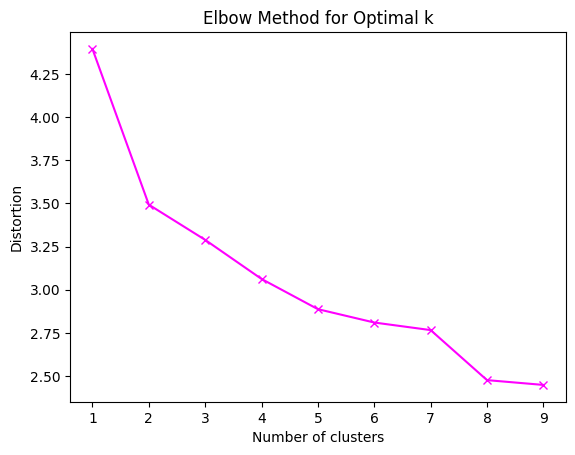

In [12]:
from scipy.spatial.distance import cdist

distortions = []
K = range(1, 10)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(data_scaled)
    distortions.append(sum(np.min(cdist(data_scaled, kmeans.cluster_centers_, 'euclidean'), axis=1)) / data_scaled.shape[0])

plt.plot(K, distortions, 'x-', color='magenta')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.title('Elbow Method for Optimal k')
plt.show()
#menentukan jumlah cluster yang paling tepat untuk dataset saat menggunakan algoritma KMeans.

- Silhouette Score: Dari ketiga model,
KMeans Silhouette memiliki Score paling tinggi, artinya cluster yang dihasilkan cukup jelas dan terpisah satu sama lain. MiniBatchKMeans sedikit di bawah KMeans, tapi masih oke karena cluster-nya juga cukup terpisah. Sebaliknya, Agglomerative Clustering dapat skor paling rendah, yang menunjukkan cluster-nya saling tumpang tindih dan kurang rapi.

- Davies-Bouldin Score: KMeans lagi-lagi unggul dengan Davies-Bouldin Score paling kecil, yang artinya cluster-nya kompak dan berjauhan satu sama lain. MiniBatchKMeans skor-nya sedikit lebih besar dari KMeans, jadi cluster-nya sedikit kurang kompak. Sementara itu, Agglomerative Clustering punya skor tertinggi, yang menunjukkan cluster-nya kurang rapat dan cenderung berdekatan, jadi hasilnya kurang bagus.

- Calinski-Harabasz Score: KMeans kembali menang dengan Calinski-Harabasz Score tertinggi, artinya cluster yang dibuat punya densitas bagus dan jarak antar cluster cukup besar. MiniBatchKMeans skornya lumayan mendekati KMeans, jadi masih cukup baik. Tetapi, Agglomerative Clustering skornya paling rendah, menunjukkan cluster-nya cenderung kurang padat dan tidak terlalu terpisah.

Kesimpulannya, KMeans adalah model pilihan terbaik untuk dataset ini karena performanya bagus di semua metrik. MiniBatchKMeans bisa menjadi alternatif, sementara Agglomerative Clustering kurang cocok karena performanya yang rendah di semua aspek.